<a href="https://colab.research.google.com/github/trungsi/DS-project---Road-accidents-in-France/blob/master/Road_accidents_model_1_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
sys.path.append("/content/drive/My Drive/DataScience project/")
import utils

In [ ]:
# load carateristiques files
df_carac = utils.read_caracteristiques_files()
df_carac.head()

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200600000001,6,1,4,1545,1,2,2,1.0,3.0,53,"SANS N°, PONT DES CHEVRE",NaN,NaN,NaN,10
1,200600000002,6,1,6,805,2,2,2,4.0,3.0,53,BROU ( BD DU N° 47 A 65,NaN,NaN,NaN,10
2,200600000003,6,1,9,1340,1,2,1,1.0,6.0,53,"sans, CLAVAGRY ( RUE)",NaN,NaN,NaN,10
3,200600000004,6,1,10,1625,2,2,1,8.0,3.0,53,23EME R.I. ( RUE DU),NaN,NaN,NaN,10
4,200600000005,6,1,24,1120,1,1,1,1.0,2.0,53,MARBOZ (AVENUEDE - IMPAI,NaN,NaN,NaN,10


In [ ]:
# convert department column to correct format
df_carac = utils.cleans_departments(df_carac)

Departments before cleansing 217 [10 20 30 40 50 60 70 80 90 100 110 120 130 140 150 160 170 180 190 210
 220 230 240 250 260 270 280 290 300 310 320 330 340 350 360 370 380 390
 400 410 420 430 440 450 460 470 480 490 500 510 520 530 540 550 560 570
 580 590 600 610 620 630 640 650 660 670 680 690 700 710 720 730 740 750
 760 770 780 790 800 810 820 830 840 850 860 870 880 890 900 910 920 930
 940 950 201 202 972 971 973 974 976 '93' '92' '94' '87' '69' '38' '34'
 '13' '988' '976' '974' '972' '2B' '91' '86' '83' '80' '78' '77' '76' '72'
 '71' '67' '66' '64' '60' '51' '50' '49' '45' '37' '35' '33' '31' '30'
 '29' '22' '19' '18' '17' '74' '81' '2' '59' '95' '63' '62' '973' '2A'
 '84' '9' '73' '43' '10' '36' '16' '7' '21' '40' '24' '4' '85' '27' '28'
 '52' '68' '42' '82' '11' '987' '44' '61' '14' '56' '58' '54' '47' '41'
 '3' '75' '1' '57' '32' '39' '15' '23' '6' '5' '26' '48' '986' '971' '89'
 '25' '12' '88' '65' '53' '70' '46' '90' '8' '79' '977' '55' '978' '975'
 '06' '03' '07' '01' '

In [ ]:
# add new date related infos (date, month, days_in_year, weeks_in_year) for later analysis
df_carac = utils.enrich_dates_info(df_carac)

Elapsed time  9.695819084001414


In [ ]:
# load usagers files
df_usagers = utils.read_usagers_files()
df_usagers.head()

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh,id_vehicule,secu1,secu2,secu3
0,200600000001,1.0,1,4,1,5.0,11.0,0.0,0,0.0,1949.0,B01,NaN,NaN,NaN,NaN
1,200600000001,2.0,2,4,2,0.0,11.0,0.0,0,0.0,1948.0,B01,NaN,NaN,NaN,NaN
2,200600000001,1.0,1,1,2,5.0,11.0,0.0,0,0.0,1921.0,A01,NaN,NaN,NaN,NaN
3,200600000002,1.0,1,4,2,1.0,11.0,0.0,0,0.0,1972.0,A01,NaN,NaN,NaN,NaN
4,200600000002,1.0,1,4,2,2.0,11.0,0.0,0,0.0,1984.0,B01,NaN,NaN,NaN,NaN


In [ ]:
# load vehicules files
df_vehicules = utils.read_vehicules_files()
df_vehicules.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh,id_vehicule,motor
0,200600000001,0.0,7,0.0,11.0,2.0,6.0,1.0,B01,NaN,NaN
1,200600000001,0.0,13,0.0,0.0,2.0,1.0,15.0,A01,NaN,NaN
2,200600000002,0.0,7,0.0,0.0,2.0,3.0,15.0,A01,NaN,NaN
3,200600000002,0.0,7,0.0,0.0,2.0,3.0,1.0,B01,NaN,NaN
4,200600000003,0.0,10,0.0,0.0,1.0,4.0,4.0,A01,NaN,NaN


In [ ]:
# load lieux files
df_lieux = utils.read_lieux_files()
df_lieux.head()

/content/drive/My Drive/DataScience project/utils.py:23: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(base_url + prefix + str(year) + '.csv?raw=true', sep=sep, encoding='ISO-8859-1')
/content/drive/My Drive/DataScience project/utils.py:23: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(base_url + prefix + str(year) + '.csv?raw=true', sep=sep, encoding='ISO-8859-1')
/content/drive/My Drive/DataScience project/utils.py:23: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(base_url + prefix + str(year) + '.csv?raw=true', sep=sep, encoding='ISO-8859-1')


,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1,vma
0,200600000001,2,0.0,0.0,NaN,3.0,4.0,NaN,NaN,0.0,1.0,1.0,0,150,1.0,0.0,1.0,99.0,NaN
1,200600000002,3,0.0,0.0,NaN,3.0,4.0,1.0,590.0,0.0,1.0,1.0,0,80,2.0,5.0,1.0,99.0,NaN
2,200600000003,4,0.0,0.0,NaN,0.0,1.0,NaN,NaN,0.0,1.0,1.0,0,37,1.0,0.0,4.0,99.0,NaN
3,200600000004,4,0.0,0.0,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,0,80,2.0,0.0,1.0,3.0,NaN
4,200600000005,3,0.0,0.0,NaN,2.0,2.0,27.0,50.0,2.0,1.0,1.0,0,100,1.0,0.0,1.0,99.0,NaN


  department  acc_count
0         75     107065
1         13      61996
2         93      45316
3         92      40764
4         94      39841


<Axes: xlabel='department', ylabel='acc_count'>

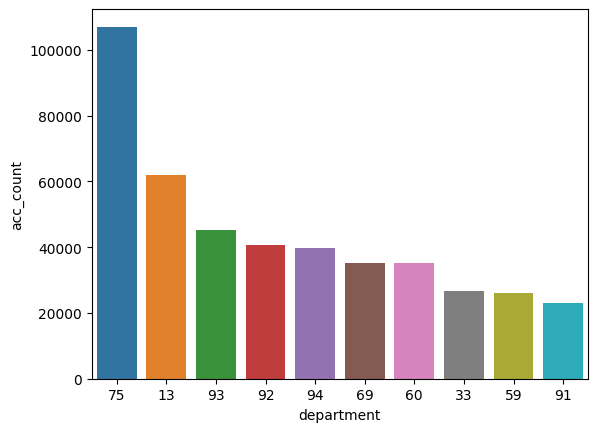

In [ ]:
# number of accidents by department
utils.plot_accident_count_by_departments(df_carac)

# Paris (75) is the region with the highest frequency of road accidents

To show on a map ?

<Axes: xlabel='atm', ylabel='acc_count'>

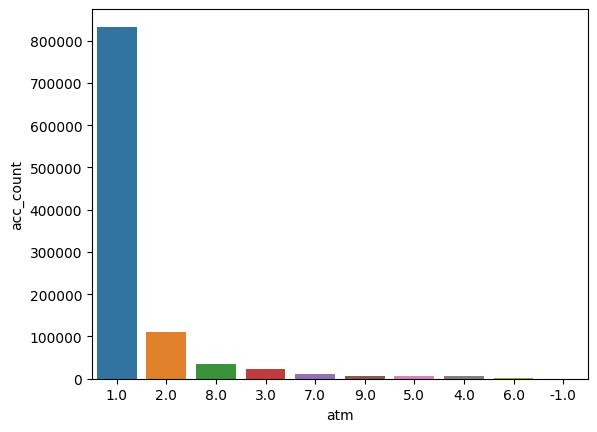

In [ ]:
# number of accidents by atmosphere condition
utils.plot_accident_count_by_atmosphere_conditions(df_carac)

# Atmosphere conditions doesn’t seem to impact the road accidents frequency.

Most accidents happen in normal condition (1).

In [ ]:
print('gravity', df_usagers.grav.unique())

gravity [ 4  1  3  2 -1]


Multiple passengers can be impacted by an accident. 
The severity of each passenger is classified by


*   1: Ininjured
*   2: Killed
*   3: Injured, in hospital
*   4: Sligtly injured
*   -1: Uknown

The overall severity of an accident can be seen as an aggregation of severity of all passengers impacted. 

The severity can be converted to numerical values as below.

Severity|Value
-------|-----
Ininjured (1), Unknown (-1) | 0 
Slightly injured (4) | 3 
Injured, in hispital (3) | 7 
Killed (2) | 13

It could be an naive approach of using values in Fibonacci suite for severity calculation.

Then we can use regression to predict the severity. It could then be used in insurance to predict the claim costs.


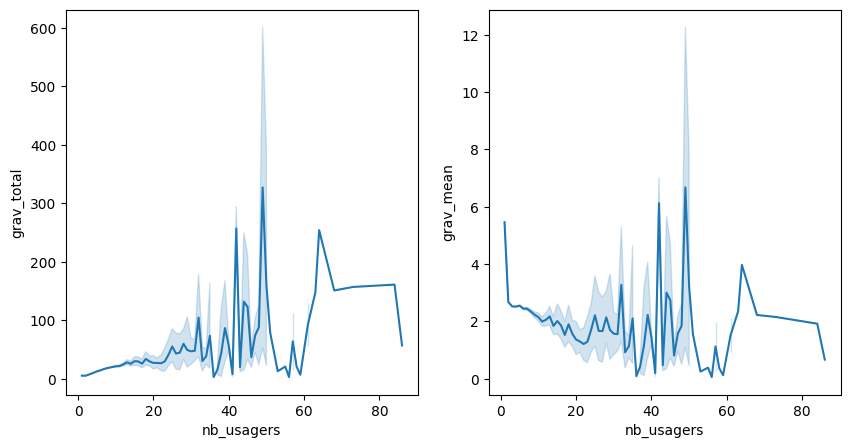

In [ ]:
# calculate severity (total and mean)
df_acc = utils.calculate_severity_for_accident(df_usagers, df_carac)

fig = utils.plot_severity_by_number_of_pessengers(df_acc)

In the above graphs, the average severity looks less dependent on number of passengers than total severity. We can use grav_mean as target variable for prediction.

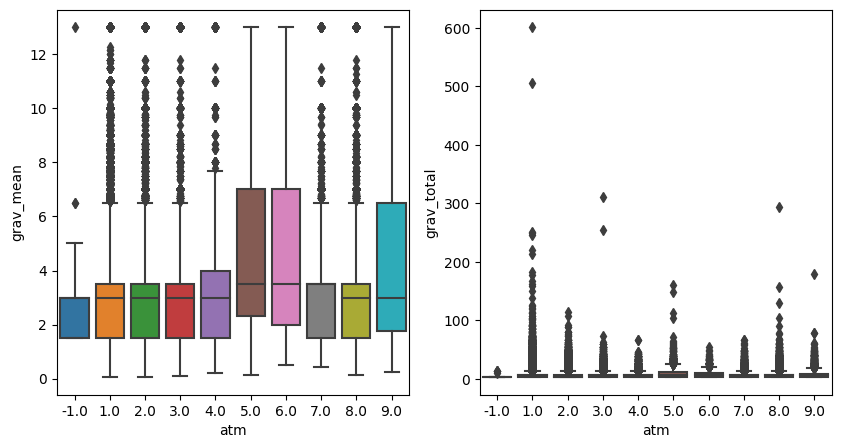

In [ ]:
# relation between atmosphere and severity
fig = utils.plot_severity_by_atmosphere_condition(df_acc)

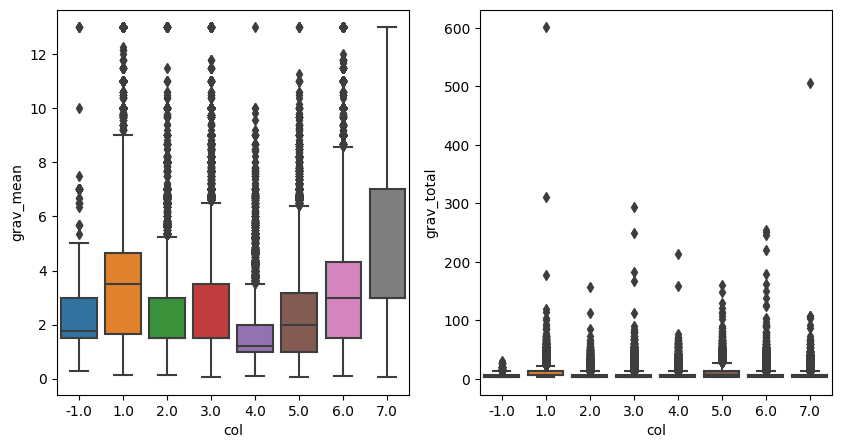

In [ ]:
# relation between type of collision and severity
fig = utils.plot_severity_by_collision_type(df_acc)

From above graphs, we can see that outlier effect is less with grav_mean than with grav_total. 

# No collision (7) accident showed the highest road accident severity, followed by the frontal collision (1) of two vehicles

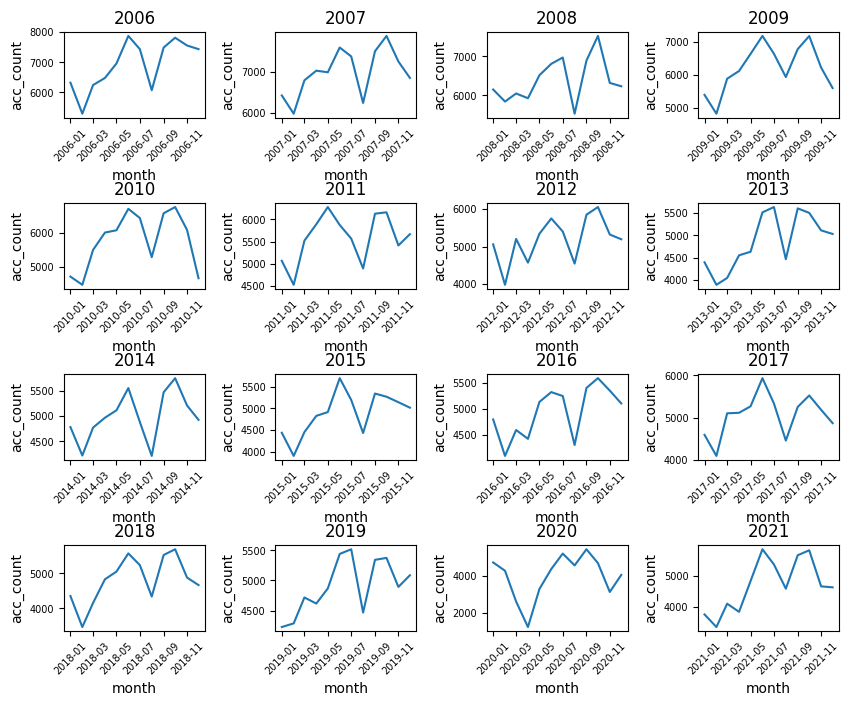

In [ ]:
# Detailed view of number of accidents by month and year.
# It could help to detect seasonality aspects.
fig = utils.plot_accident_count_by_month_and_year(df_acc)

We can observe some trend on number of accidents over period of 12 months. 

Uptrend: from Feb to June and from Aug to Oct.

Downtren: from Oct to Feb and from June to Aug. 

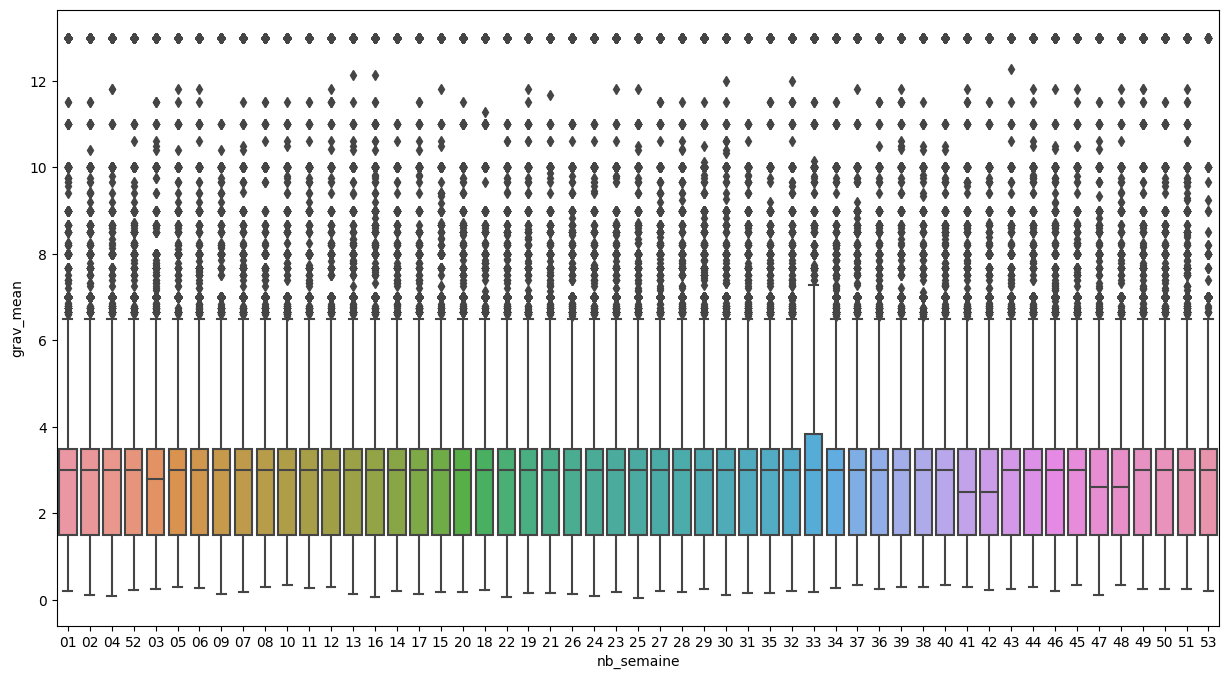

In [ ]:
# weekly view on severity of accidents
fig = utils.plot_severity_by_week(df_acc)

# The period of the year apparently has no influence on the severity whereas the frequency of accidents appears to be higher in the period before and after the summer season with the highest peak the first week of October

In [ ]:
# add lieux info
df_acc = utils.add_lieux_info_to_accidents(df_lieux, df_acc)

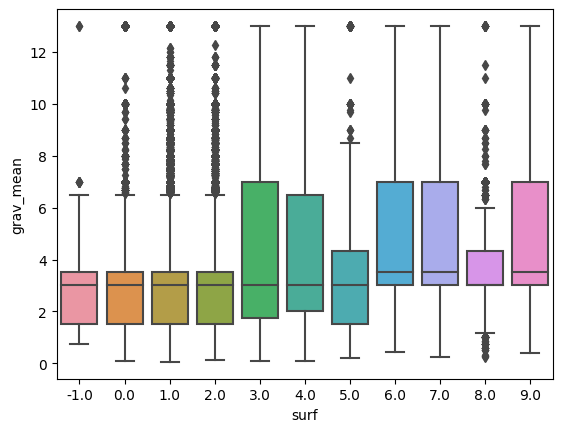

In [ ]:
# relation between road surface and severity
fig = utils.plot_severity_by_road_surface(df_acc)

# The severity is likely to be higher when there is flood or snow in the road surface

In [ ]:
df_acc = utils.add_vehicule_info_to_accidents(df_vehicules, df_acc)

In [ ]:
print(df_acc.isna().sum())

Num_Acc              0
an                   0
mois                 0
jour                 0
hrmn                 0
lum                  0
agg                  0
int                  0
atm                 73
col                 19
com                  0
adr             126488
gps             581530
lat             426985
long            426989
dep                  0
date                 0
month                0
nb_jour              0
nb_semaine           0
grav_mean            0
grav_total           0
nb_usagers           0
catr                 0
circ              1574
prof              1949
plan              2281
infra             5408
situ              4970
surf              1924
vma             871443
nb_vehicules         0
dtype: int64


# some columns (adr, gps, lat, long and vma) contains a lot of NA. So dropna will largely reduce data size. 

It's better ignoring theses (drop columns) when preparing data for machine learning.

In [ ]:
grav_by_deps = df_acc[['dep', 'grav_mean', 'grav_total', 'nb_usagers']].groupby('dep').agg(['count', 'sum', 'mean'])
grav_by_deps = grav_by_deps.drop(columns=[grav_by_deps.columns[0], grav_by_deps.columns[1], 
                                           grav_by_deps.columns[3], grav_by_deps.columns[8]])
grav_by_deps.columns = ['grav_mean_mean', 'grav_total_total', 'grav_total_mean', 'acc_count', 'nb_usagers_total']
grav_by_deps = grav_by_deps.reset_index()
                       
grav_by_deps.sort_values(by='grav_total_mean', ascending=False).head()

,dep,grav_mean_mean,grav_total_total,grav_total_mean,acc_count,nb_usagers_total
40,39,4.991797,20893,10.462193,1997,4862
106,987,5.119988,3627,9.936986,365,809
86,85,4.544402,49139,9.370519,5244,12228
104,978,4.354968,973,9.355769,104,244
23,24,4.676316,37095,9.269115,4002,9174


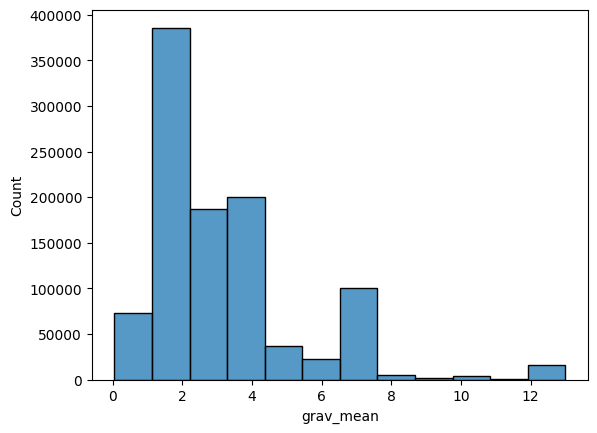

In [ ]:
fig = utils.plot_severity_histogram(df_acc)

# mean gravity varies from 0 to 13 with mean around 3 and majority (75%) are less than 4
Data is skewed
It may be difficult to detect outlier.

/content/drive/My Drive/DataScience project/utils.py:204: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_acc_reduced.corr(),  annot=True, cmap="RdBu_r", center =0);


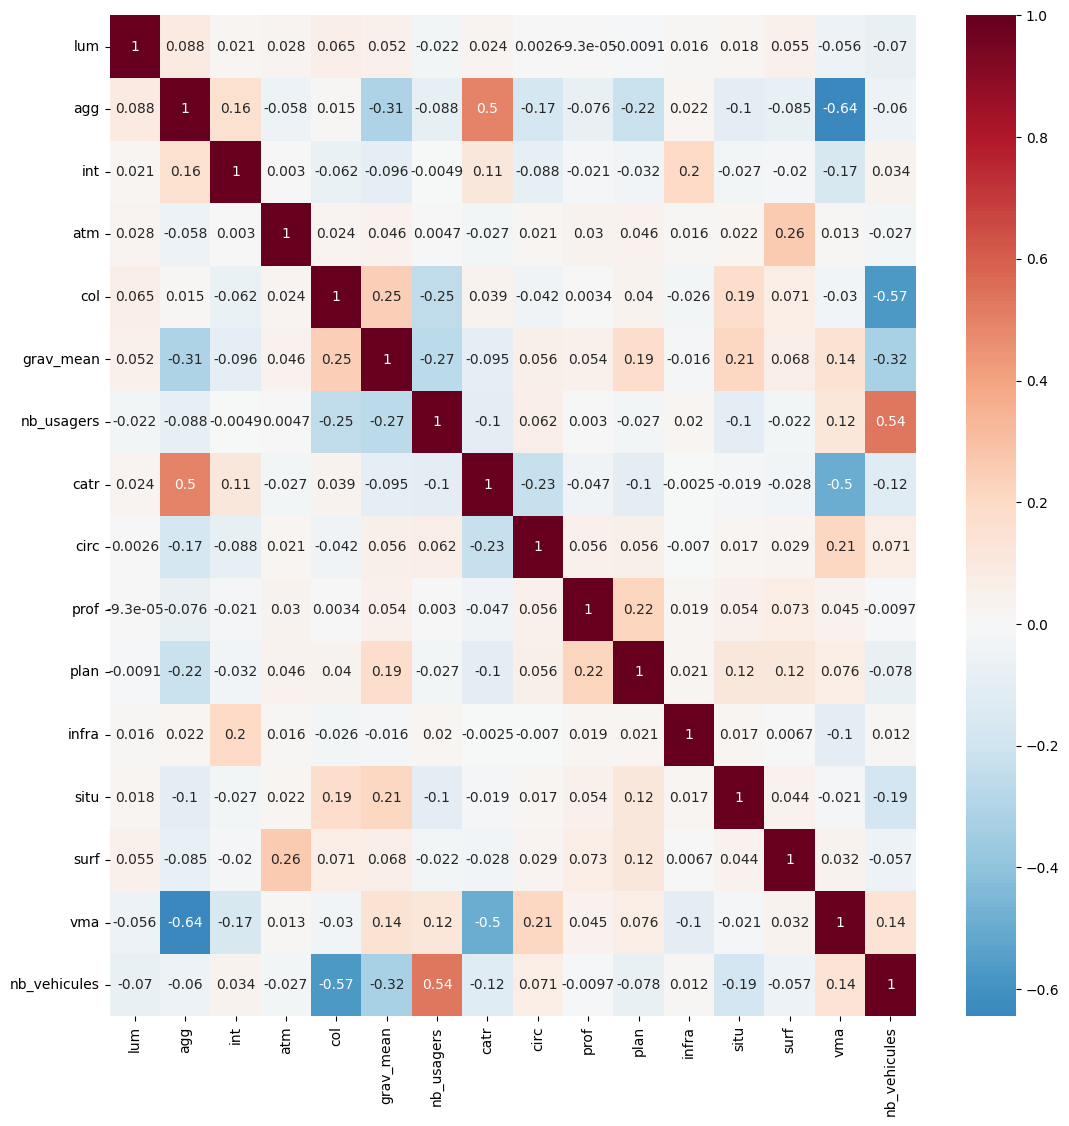

In [ ]:
fig = utils.plot_correlation_heatmap(df_acc)

# Number of usagers is highly influent on gravity. 
# The Location (agglomeration or hors agglomeration) is the second most important feature. 
# Collision type comes next as the third important feature.
# All other features are not important. Can they be excluded from the model ?

In [ ]:
path = '/content/drive/My Drive/DataScience project/Road accidents - model.csv'
utils.save_csv(df_acc, path)